In [5]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#from cluster_data_creation import data_for_cluster, cluster_extract

In [6]:
feat_num = 21
classes = 3

# load data from df to arrays to train and test

def xls2df(df, N, split=0.8):
    # strings of feature names for reference
    # of 21 features
    feat_num = 21
    classes = 3
    feature_names = np.array([data[i][0] for i in range(1, feat_num+classes)])
    
    # load all data
    all_data = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                     for j in range(1, N+1)])
    # load all labels
    all_labels = np.array([data[23][i] for i in range(1, N+1)])
    
    # shuffle indices so that no class gets huddled together
    idxs = [i for i in range(N)]
    np.random.shuffle(idxs)
    all_data = all_data[idxs]
    all_labels = all_labels[idxs]
    
    # split into 80: 20 for test: train data
    train_num = int(N*split)

    # load train data
    train_data = all_data[:train_num]
    
    # load train labels
    train_labels = all_labels[:train_num]
    
    # load test data
    test_data = all_data[train_num:]
    
    # load test labels
    test_labels = all_labels[train_num:]
    
    return train_data, train_labels, test_data, test_labels

# Test on original dataset

Linear SVM

In [15]:
# load data
xls = pd.ExcelFile('../CTG.xls')
data = pd.read_excel(xls, 'Data')

x_train, y_train, x_test, y_test = xls2df(data, 2126)

Max accuracy: 0.9014084507042254
Max fscore: 0.7984057412291449
Best C, acc to accuracy: 91
Best C, acc to f-score: 91


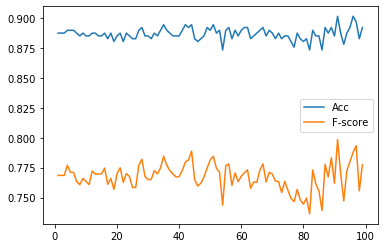

In [5]:
# check for different values of C
accs = []
fscores = []
x1, x2 = 1, 100
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = SVC(kernel='linear', C = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i
        
plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best C, acc to accuracy:", best_acc_n)
print("Best C, acc to f-score:", best_fs_n)
#print("Accuracy and fscore remained the same from C=1 to 1100")

Max accuracy: 0.8967136150234741
Max fscore: 0.7825124955559738
Best C, acc to accuracy: 100
Best C, acc to f-score: 100


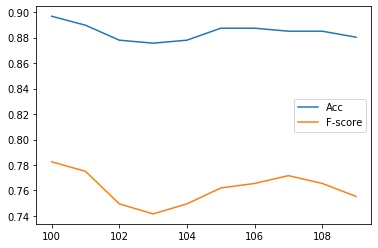

In [7]:
## try again for a larger interval
# check for different values of C
accs = []
fscores = []
x1, x2 = 100, 110
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = SVC(kernel='linear', C = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i
        
plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best C, acc to accuracy:", best_acc_n)
print("Best C, acc to f-score:", best_fs_n)
#print("Accuracy and fscore remained the same from C=1 to 1100")

Test on original with polynomial svm

Max accuracy: 0.9154929577464789
Max fscore: 0.8320862427100107
Best degree, acc to accuracy: 21
Best degree, acc to f-score: 21


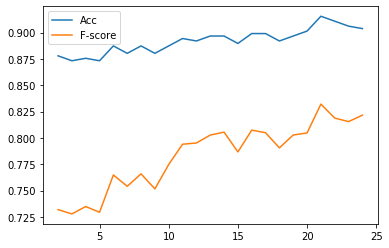

In [6]:
# check for different degreea of polynomials
accs = []
fscores = []
x1, x2 = 2, 25
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = SVC(kernel='poly', degree=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i
        
plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best degree, acc to accuracy:", best_acc_n)
print("Best degree, acc to f-score:", best_fs_n)

Max accuracy: 0.9225352112676056
Max fscore: 0.8563806547965543
Best degree, acc to accuracy: 28
Best degree, acc to f-score: 28


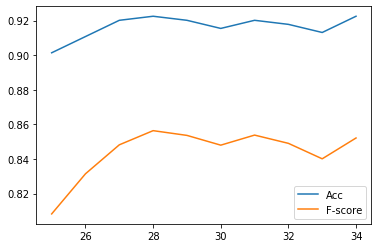

In [8]:
# try again for a larger interval
# check for different degreea of polynomials
accs = []
fscores = []
x1, x2 = 25, 35
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = SVC(kernel='poly', degree=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i
        
plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best degree, acc to accuracy:", best_acc_n)
print("Best degree, acc to f-score:", best_fs_n)

RBF Kernel

In [17]:
model = SVC(kernel='rbf', C=20, gamma=.09)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.8192488262910798
F-score of Guassian NB: 0.4177065354679575


# Test on artificial data set with best parameters found above

In [19]:
# load data
xls = pd.ExcelFile('../data_creation/artificial_FINAL.xlsx')
data = pd.read_excel(xls, 'Sheet1')

x_train, y_train, x_test, y_test = xls2df(data, 4055)

Linear SVM

In [8]:
model = SVC(kernel='linear', C = 91)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.8890258939580764
F-score of Guassian NB: 0.8854727959717534


Polynomial SVM

In [10]:
model = SVC(kernel='poly', degree=28)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.8877928483353884
F-score of Guassian NB: 0.8847356733834486


RBF Kernel

In [20]:
model = SVC(kernel='rbf', C=20, gamma=.09)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.43896424167694204
F-score of Guassian NB: 0.2616996819188571
